In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
data = pd.read_csv("mnist_train.csv")

In [5]:
rownum  = 10
if -1<rownum <len(data):
    pixels = data.iloc[rownum,1:].values.reshape(28,28)
    array1 =np.array(pixels,dtype=np.uint8)


Text(0.5, 1.0, 'Original Image')

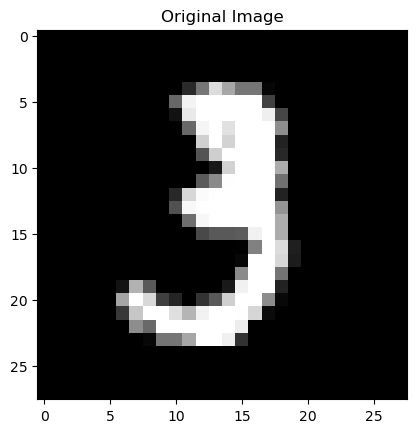

In [6]:
plt.imshow(array1,cmap='gray')
plt.title("Original Image")

In [1]:
def fourier_transform(image):
    return np.fft.fftshift(np.fft.fft2(image)) 

In [7]:
def apply_filter(fourier_image, filter_mask):
    return fourier_image * filter_mask

In [9]:
def ideal_low_pass_filter(shape,cutoff):
    rows,cols = shape
    center_row,center_col = rows//2,cols//2
    mask = np.zeros(shape)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i-center_row)**2 + (j-center_col)**2) <= cutoff:
                mask[i,j] = 1
    return mask

In [10]:
def inverse_fourier_transform(filtered_image):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_image)))

In [11]:
def ideal_high_pass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_row)**2 + (j - center_col)**2) <= cutoff:
                mask[i, j] = 0
    return mask

In [12]:
def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = np.exp(-(d**2) / (2 * (cutoff**2)))
    return mask


In [13]:
def gaussian_high_pass_filter(shape, cutoff):
    return 1 - gaussian_low_pass_filter(shape, cutoff)


In [14]:
image=array1
# Fourier Transform
fourier_image = fourier_transform(image)


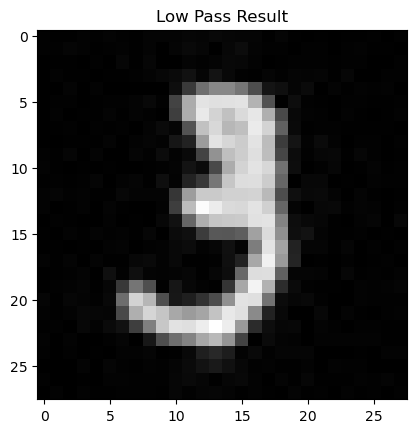

In [24]:
# Ideal Low Pass Filtering
cutoff = 10
low_pass_mask = ideal_low_pass_filter(image.shape, cutoff)
low_pass_filtered = apply_filter(fourier_image, low_pass_mask)
low_pass_result = inverse_fourier_transform(low_pass_filtered)
plt.title("Low Pass Result")
plt.imshow(low_pass_result, cmap='gray')

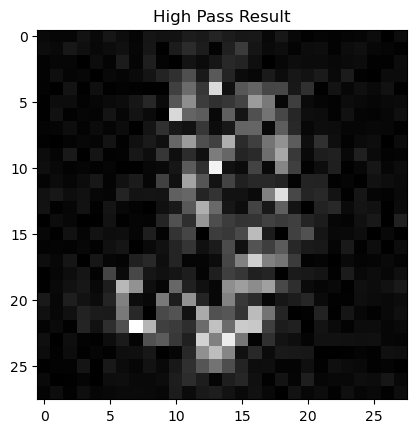

In [25]:
# Ideal High Pass Filtering
cutoff = 10
high_pass_mask = ideal_high_pass_filter(image.shape, cutoff)
high_pass_filtered = apply_filter(fourier_image, high_pass_mask)
high_pass_result = inverse_fourier_transform(high_pass_filtered)
plt.title("High Pass Result")
plt.imshow(high_pass_result, cmap='gray')

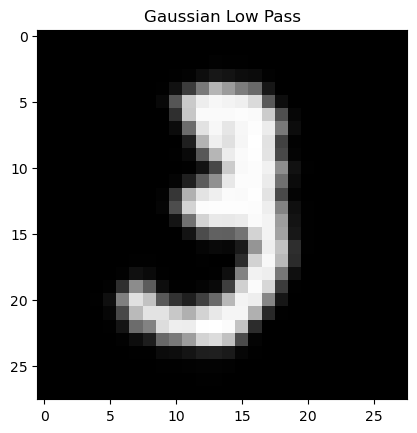

In [26]:
# Gaussian Low Pass Filtering
gaussian_low_pass_mask = gaussian_low_pass_filter(image.shape, cutoff)
gaussian_low_pass_filtered = apply_filter(fourier_image, gaussian_low_pass_mask)
gaussian_low_pass_result = inverse_fourier_transform(gaussian_low_pass_filtered)
plt.title("Gaussian Low Pass")
plt.imshow(gaussian_low_pass_result, cmap='gray')

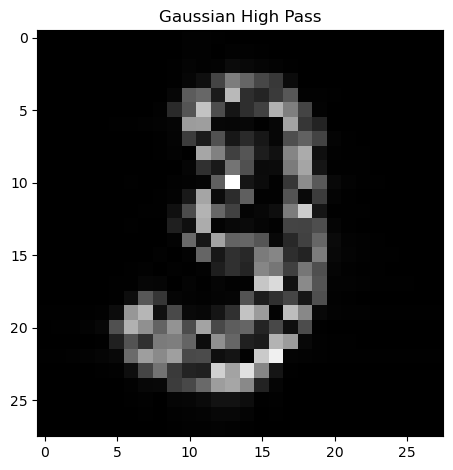

In [27]:
# Gaussian High Pass Filtering
gaussian_high_pass_mask = gaussian_high_pass_filter(image.shape, cutoff)
gaussian_high_pass_filtered = apply_filter(fourier_image, gaussian_high_pass_mask)
gaussian_high_pass_result = inverse_fourier_transform(gaussian_high_pass_filtered)
plt.title("Gaussian High Pass")
plt.imshow(gaussian_high_pass_result, cmap='gray')
plt.tight_layout()